In [1]:
# XGBM & LGBM

C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_7880\3773682167.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, palette='viridis')
C:\Users\Shreyas Mahale\AppData\Local\Temp\ipykernel_7880\3773682167.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_df, palette='magma')


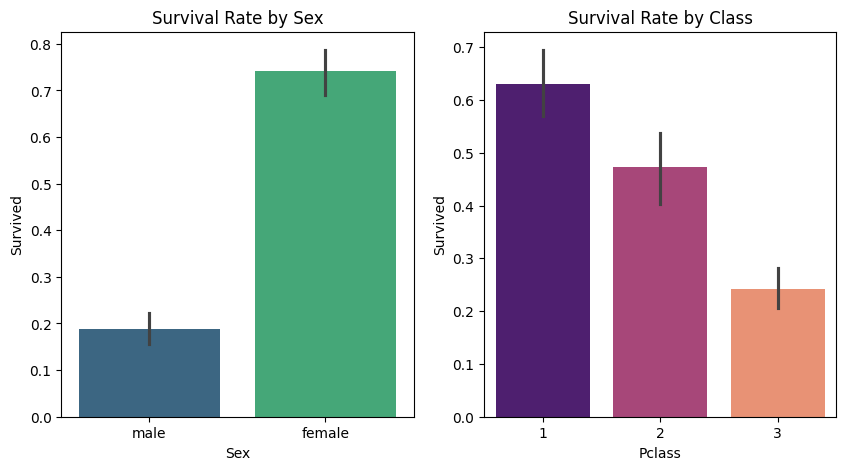

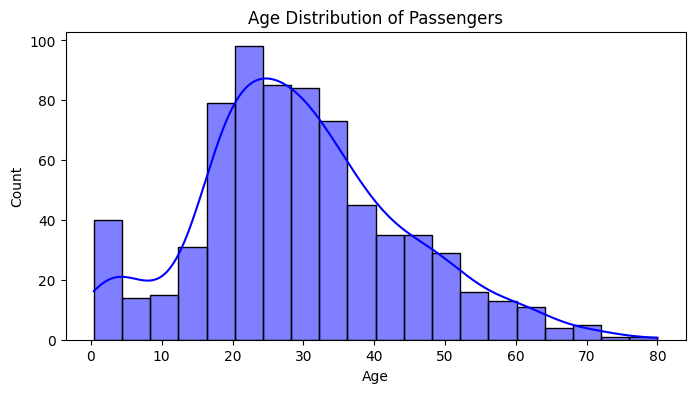

c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:41:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:41:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:41:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserW

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


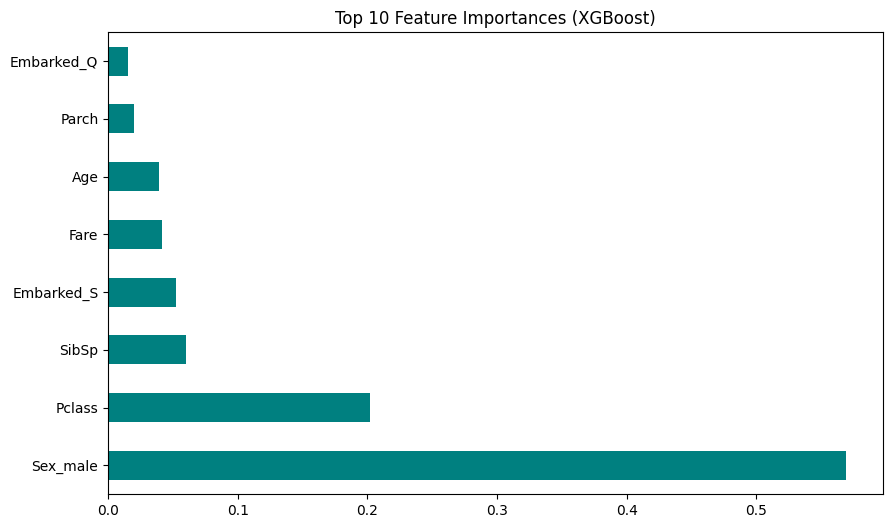

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --- 1. Load Data ---
train_df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv")
test_df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv")

# --- 2. Exploratory Data Analysis (EDA) ---
# Survival by Sex
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Sex', y='Survived', data=train_df, palette='viridis')
plt.title('Survival Rate by Sex')

# Survival by Class
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='magma')
plt.title('Survival Rate by Class')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(train_df['Age'].dropna(), kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.show()

# --- 3. Data Preprocessing ---
def preprocess_titanic(df):
    # Dropping columns that won't help the model 
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    
    # Impute the Missing Values
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    # Encoding Categorical Variables
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    return df

# Preprocess the training data 
train_cleaned = preprocess_titanic(train_df)
X = train_cleaned.drop('Survived', axis=1)
y = train_cleaned['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Building Predictive Models ---

# A. XGBoost Model with Hyperparameter Tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

# B. LightGBM Model with Hyperparameter Tuning
lgbm = LGBMClassifier(random_state=42)
lgbm_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50]
}
grid_lgbm = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='accuracy')
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_

# --- 5. Comparative Evaluation ---
models = {'XGBoost': best_xgb, 'LightGBM': best_lgbm}
results = []

for name, model in models.items():
    y_pred = model.predict(X_val)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1-Score': f1_score(y_val, y_pred)
    })

results_df = pd.DataFrame(results)
print("\n### Model Performance Comparison ###")
print(results_df)

# --- 6. Feature Importance ---
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()